1 .đọc dữ liệu sau đó hiển thị dòng đầu tiên, thông tin về dữ liệu, thống kê mô tả
2. kiểm tra giá trị thiếu
2.2 vẽ histogram cho tất cả các biến và nhận xét
2.3 ve boxplot cho tât cà các biên và nhận xét
2.4 Vé Scatterplot cho "alcohol và "quality"
3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó
4. Chia tập dữ liệu thủ công không dùng thư viện có sẵn
4.1  Xáo trộn dữ liệu
4.2 Chia dữ liệu với 80% huấn luyện
4.3 Tách dữ liệu
4.4 Tách đặc trưng và nhãn
5. Chuẩn bị dữ liệu
5.1 Khởi tạo bộ dữ liệu chuẩn hóa
5.2 Chuẩn hóa huân luyện
5.3 chuẩn hóa kiềm tra
6. Ứng dụng mô hành hồi quy tuyến tính
6.1 khởi tạo
6.2 huãn luyện
6.3 dự đoán trên tập kiếm tra
7. Đánh giá mô hinh

Tính MSE và R^2

In [9]:
# 1. Đọc dữ liệu, sau đó hiện thị 5 dòng đầu tiên, thông tin về dữ liệu, thông kê mô tả.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file CSV
df = pd.read_csv('winequality-red.csv', sep=';', encoding='utf-8')

# Hiển thị 5 dòng đầu tiên
print("Thong tin 5 dong dau tien")
print(df.head())

# Thông tin về dữ liệu
print("Thong tin ve du lieu")
print(df.info())

# Thống kê mô tả
print("Thong ke mo ta")
print(df.describe())





Thong tin 5 dong dau tien
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8      

Kiem tra gia tri thieu
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Histogram cho tat ca cac bien va nhan xet


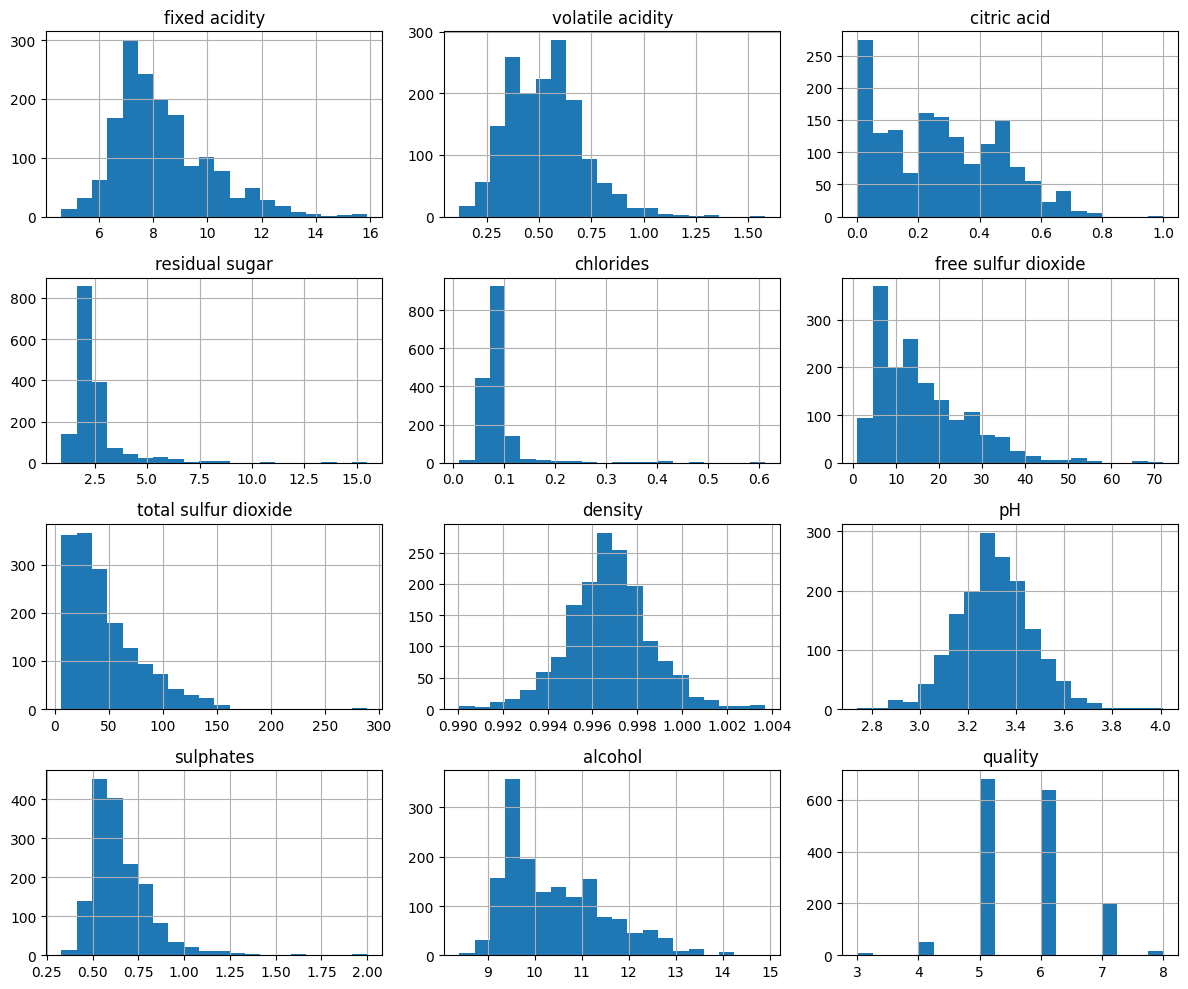

Boxplot cho tat ca cac bien va nhan xet


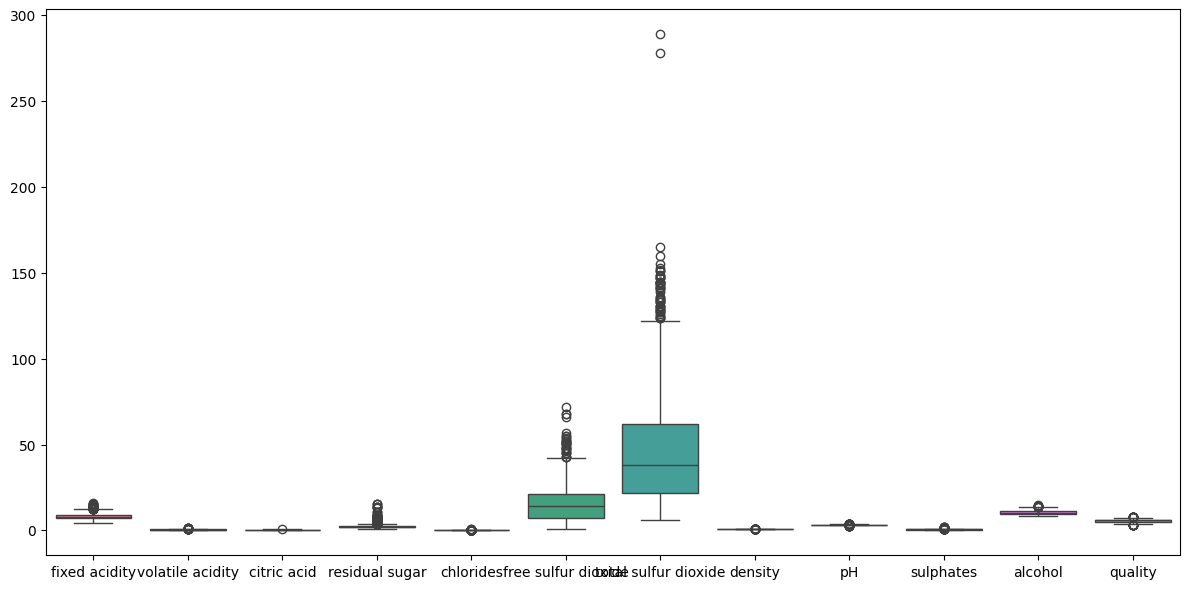

Scatterplot cho 'alcohol' va 'quality'


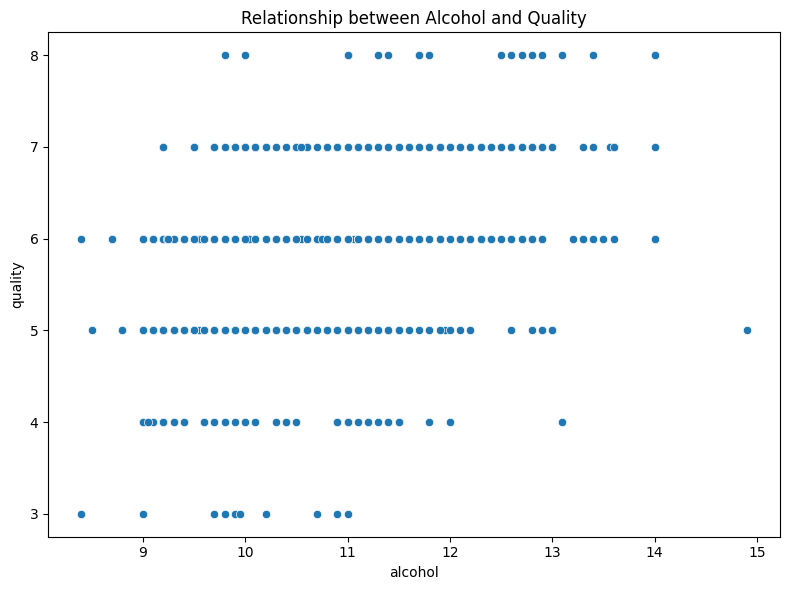

In [11]:
# 2.1 Kiểm tra giá trị thiếu
print("Kiem tra gia tri thieu")
print(df.isnull().sum())

# 2.2 Vẽ histogram cho tất cả các cột và nhận xét
print("Histogram cho tat ca cac bien va nhan xet")
df.hist(bins=20, figsize=(12, 10))  # Thêm df.hist() để vẽ histogram cho tất cả cột
plt.tight_layout()  # Tự động điều chỉnh bố cục
plt.show()  # Hiển thị biểu đồ

# Nhận xét: (Ví dụ: Quan sát sự phân bố của các cột, kiểm tra có lệch phải hoặc lệch trái)

# 2.3 Vẽ boxplot cho tất cả các cột và nhận xét
print("Boxplot cho tat ca cac bien va nhan xet")
plt.figure(figsize=(12, 6))  # Tạo figure mới và đặt kích thước
sns.boxplot(data=df)  # Vẽ boxplot
plt.tight_layout()  # Điều chỉnh bố cục
plt.show()  # Hiển thị biểu đồ

# Nhận xét: (Ví dụ: Kiểm tra ngoại lệ trong dữ liệu)

# 2.4 Vẽ scatterplot cho "alcohol" và "quality"
print("Scatterplot cho 'alcohol' va 'quality'")
plt.figure(figsize=(8, 6))  # Tạo figure mới và đặt kích thước
sns.scatterplot(x="alcohol", y="quality", data=df)  # Vẽ scatterplot
plt.title("Relationship between Alcohol and Quality")  # Thêm tiêu đề
plt.tight_layout()  # Điều chỉnh bố cục
plt.show()  # Hiển thị biểu đồ

# Nhận xét: (Ví dụ: Kiểm tra xu hướng tương quan giữa alcohol và quality)

Tinh ma tran tuong quan
Ve heatmap cua ma tran tuong quan


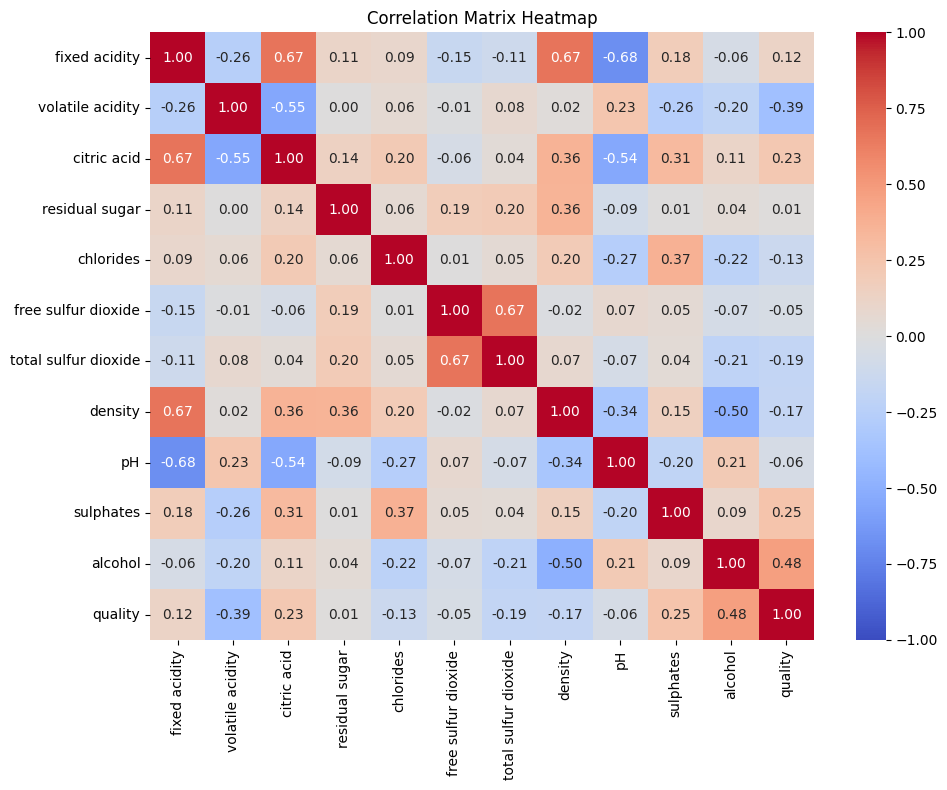

In [12]:
# 3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó

# Tính ma trận tương quan
print("Tinh ma tran tuong quan")
corr = df.corr()

# Vẽ heatmap
print("Ve heatmap cua ma tran tuong quan")
plt.figure(figsize=(10, 8))  # Đặt kích thước cho heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)  # Vẽ heatmap
plt.title("Correlation Matrix Heatmap")  # Thêm tiêu đề
plt.tight_layout()  # Điều chỉnh bố cục
plt.show()

# Nhận xét: (Ví dụ: Quan sát các cặp biến có tương quan mạnh, cả dương và âm)

In [ ]:
import pandas as pd
import numpy as np

# 4.1 Xáo trộn dữ liệu
print("4.1 Xao tron du lieu")
np.random.seed(42)  # Đặt seed để tái lập ngẫu nhiên
random_indices = np.random.permutation(len(df))  # Tạo mảng chỉ số ngẫu nhiên
df_shuffled = df.iloc[random_indices]  # Sắp xếp lại DataFrame theo chỉ số ngẫu nhiên
print("Du lieu da duoc xao tron:")
print(df_shuffled.head())

# 4.2 Chia dữ liệu với 80% huấn luyện
print("4.2 Chia du lieu voi 80% huấn luyện")
test_size = int(0.2 * len(df))  # 20% cho tập kiểm tra
train_data = df_shuffled[:-test_size]  # 80% đầu tiên cho tập huấn luyện
test_data = df_shuffled[-test_size:]   # 20% cuối cùng cho tập kiểm tra
print(f"Kich thuoc tap huan luyen: {len(train_data)}")
print(f"Kich thuoc tap kiem tra: {len(test_data)}")

# 4.3 Tách dữ liệu
print("4.3 Tach du lieu")
train_rows = train_data.values  # Chuyển thành mảng numpy
test_rows = test_data.values    # Chuyển thành mảng numpy
print("Kich thuoc tap huan luyen (sau tach):", train_rows.shape)
print("Kich thuoc tap kiem tra (sau tach):", test_rows.shape)

# 4.4 Tách đặc trưng và nhãn
print("4.4 Tach dac trung va nha")
# Giả sử cột cuối cùng 'quality' là nhãn, các cột còn lại là đặc trưng
X_train = train_rows[:, :-1]  # Tất cả cột trừ cột cuối cùng (đặc trưng)
y_train = train_rows[:, -1]   # Cột cuối cùng (nhãn)
X_test = test_rows[:, :-1]    # Tất cả cột trừ cột cuối cùng (đặc trưng)
y_test = test_rows[:, -1]     # Cột cuối cùng (nhãn)

print("Kich thuoc tap dac trung huan luyen (X_train):", X_train.shape)
print("Kich thuoc tap nha huan luyen (y_train):", y_train.shape)
print("Kich thuoc tap dac trung kiem tra (X_test):", X_test.shape)
print("Kich thuoc tap nha kiem tra (y_test):", y_test.shape)

4.1 Xao tron du lieu
Du lieu da duoc xao tron:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
835             7.6             0.665         0.10             1.5      0.066   
1347            7.2             0.655         0.03             1.8      0.078   
995             7.7             0.600         0.06             2.0      0.079   
994            10.0             0.350         0.45             2.5      0.092   
1465            6.8             0.590         0.10             1.7      0.063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
835                  27.0                  55.0  0.99655  3.39       0.51   
1347                  7.0                  12.0  0.99587  3.34       0.39   
995                  19.0                  41.0  0.99697  3.39       0.62   
994                  20.0                  88.0  0.99918  3.15       0.43   
1465                 34.0                  53.0  0.99580  3.41       0.67   

   

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Giả sử X_train và X_test đã được tạo từ các bước trước
# Ví dụ: X_train, X_test từ câu 4.4

# 5.1 Khởi tạo bộ dữ liệu chuẩn hóa
print("5.1 Khoi tao bo du lieu chuan hoa")
scaler = StandardScaler()

# 5.2 Chuẩn hóa huấn luyện
print("5.2 Chuan hoa huan luyen")
X_train_scaled = scaler.fit_transform(X_train)  # Tính mean và std trên X_train, sau đó chuẩn hóa
print("Kich thuoc X_train_scaled:", X_train_scaled.shape)
print("Gia tri trung binh cua X_train_scaled (du kien gan 0):", np.mean(X_train_scaled, axis=0))
print("Do lech chuan cua X_train_scaled (du kien gan 1):", np.std(X_train_scaled, axis=0))

# 5.3 Chuẩn hóa kiểm tra
print("5.3 Chuan hoa kiem tra")
X_test_scaled = scaler.transform(X_test)  # Sử dụng mean và std từ X_train để chuẩn hóa X_test
print("Kich thuoc X_test_scaled:", X_test_scaled.shape)
print("Gia tri trung binh cua X_test_scaled:", np.mean(X_test_scaled, axis=0))
print("Do lech chuan cua X_test_scaled:", np.std(X_test_scaled, axis=0))

5.1 Khoi tao bo du lieu chuan hoa
5.2 Chuan hoa huan luyen
Kich thuoc X_train_scaled: (1280, 11)
Gia tri trung binh cua X_train_scaled (du kien gan 0): [-3.17801341e-16  1.50573998e-16  7.77156117e-17 -9.57567359e-17
  1.83186799e-16 -8.32667268e-18  8.32667268e-18 -5.26238775e-14
  4.45754544e-15 -2.63677968e-16 -1.60704783e-15]
Do lech chuan cua X_train_scaled (du kien gan 1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
5.3 Chuan hoa kiem tra
Kich thuoc X_test_scaled: (319, 11)
Gia tri trung binh cua X_test_scaled: [-0.07350081  0.15636088 -0.06691738  0.13474139  0.09127116  0.12550392
  0.12172427  0.01205601  0.0384273   0.0832614  -0.01779433]
Do lech chuan cua X_test_scaled: [1.01383277 0.99868466 0.97774904 1.35214423 1.18966121 1.10763099
 0.99851961 1.05056113 1.03099349 1.2291231  0.97476621]


In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Giả sử X_train_scaled, X_test_scaled, y_train đã được tạo từ bước 5
# Ví dụ: X_train_scaled, X_test_scaled từ câu 5

# 6.1 Khởi tạo
print("6.1 Khoi tao")
model = LinearRegression()

# 6.2 Huấn luyện
print("6.2 Huan luyen")
model.fit(X_train_scaled, y_train)  # Huấn luyện mô hình trên tập huấn luyện đã chuẩn hóa
print("He so intercept (b0):", model.intercept_)
print("He so regression (coefficients):", model.coef_)

# 6.3 Dự đoán trên tập kiểm tra
print("6.3 Du doan tren tap kiem tra")
y_pred = model.predict(X_test_scaled)  # Dự đoán trên tập kiểm tra đã chuẩn hóa
print("5 gia tri du doan dau tien:", y_pred[:5])

# (Tuong tu voi X_test_scaledled)

6.1 Khoi tao
6.2 Huan luyen
He so intercept (b0): 5.64296875
He so regression (coefficients): [ 0.01703352 -0.19022448 -0.02049408 -0.00330629 -0.09656612  0.05251516
 -0.11230688 -0.01662522 -0.0929162   0.1503755   0.29555443]
6.3 Du doan tren tap kiem tra
5 gia tri du doan dau tien: [5.97668575 5.25362576 6.14865521 5.24692084 5.55878054]


In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Giả sử y là giá trị thực tế và y_pred là giá trị dự đoán
y = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

# Tính MSE (Mean Squared Error)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Tính R^2 (R-squared)
r2 = r2_score(y, y_pred)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 0.375
R-squared (R^2): 0.9486081370449679
